Analisis 2 - visualización de datos

# **Conjunto de datos rendimiento de los estudiantes**

Realizado por: Luis Felipe Sanchez Sanchez

Contexto creado:

*Este conjunto de datos es una representación sintética del rendimiento de los estudiantes, diseñado para imitar situaciones del mundo real al considerar factores clave como los hábitos de estudio, los patrones de sueño, el contexto socioeconómico y la asistencia a clases. La finalidad es realizar un sencillo analisis de datos con pyhton y sus diferentes librerias para apoyar en la toma de desiciones con la argumentación encontrads

[Fuente del dataset](https://www.kaggle.com/datasets/stealthtechnologies/predict-student-performance-dataset)

In [40]:
#conexión con google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
#importacion de librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Importación del dataset


In [31]:
#importación del archivo cvs
df = pd.read_csv('/content/drive/MyDrive/Ejecicios de practica/Analisis de datos 2/data.csv')

In [32]:
df.head(7)

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0
5,0.98320,3.4,9.0,47.0,51.0
6,0.56648,7.9,8.1,63.0,54.0


In [33]:
#mostramos el typo de datos
df.dtypes

,0
Socioeconomic Score,float64
Study Hours,float64
Sleep Hours,float64
Attendance (%),float64
Grades,float64


In [34]:
#resumen general del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1388 entries, 0 to 1387
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Socioeconomic Score  1388 non-null   float64
 1   Study Hours          1388 non-null   float64
 2   Sleep Hours          1388 non-null   float64
 3   Attendance (%)       1388 non-null   float64
 4   Grades               1388 non-null   float64
dtypes: float64(5)
memory usage: 54.3 KB


In [35]:
#hallamos la media, mediana y moda de cada variable
df.describe()

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
count,1388.000000,1388.000000,1388.000000,1388.000000,1388.000000
mean,0.552274,4.560807,8.047262,58.536023,40.691643
std,0.261272,1.897581,1.370700,11.675287,9.467358
min,0.101280,0.800000,4.800000,40.000000,32.000000
25%,0.322118,3.475000,7.000000,49.000000,34.000000
50%,0.545945,3.900000,8.400000,57.000000,35.000000
75%,0.789610,5.900000,9.100000,66.000000,47.000000
max,0.999820,10.000000,10.000000,100.000000,91.000000


#Profundización de datos ingresados y limpieza

In [36]:
#Validamos cuantos datos nulos existen
df.isnull().sum()

,0
Socioeconomic Score,0
Study Hours,0
Sleep Hours,0
Attendance (%),0
Grades,0


In [37]:
#reemplazamos los datos nulos por 0
df.fillna(0, inplace=True)
df

,Socioeconomic Score,Study Hours,Sleep Hours,Attendance (%),Grades
0,0.95822,3.4,8.2,53.0,47.0
1,0.85566,3.2,5.9,55.0,35.0
2,0.68025,3.2,9.3,41.0,32.0
3,0.25936,3.2,8.2,47.0,34.0
4,0.60447,3.8,10.0,75.0,33.0
...,...,...,...,...,...
1383,0.44549,5.5,8.0,51.0,41.0
1384,0.52466,4.9,6.5,63.0,37.0
1385,0.88197,3.9,6.2,54.0,36.0
1386,0.47336,3.5,7.3,61.0,34.0


<Axes: xlabel='Sleep Hours'>

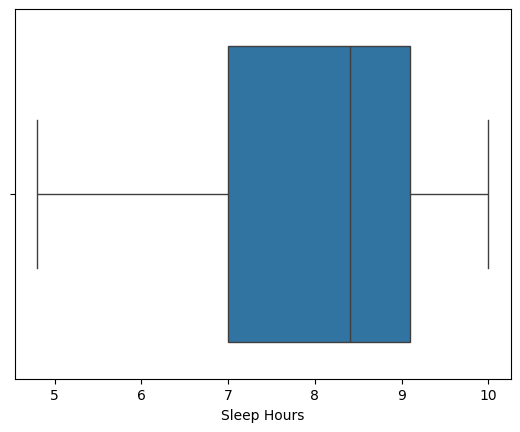

In [38]:
#realizamos un boxplot de la varialble horas de sueño
sns.boxplot(x=df['Sleep Hours'])

#Anslisis de datos

Index(['Socioeconomic Score', 'Study Hours', 'Sleep Hours', 'Attendance (%)',
       'Grades'],
      dtype='object')


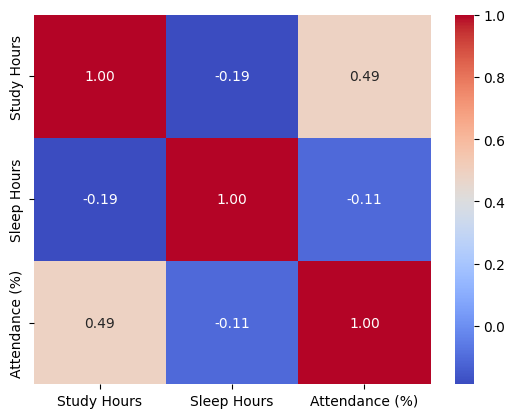

In [48]:
# Mapa de calor de correlación
# Check the actual column names in your DataFrame using df.columns
print(df.columns)
# Replace 'Score' with the actual column name if it's different
corr = df[['Study Hours', 'Sleep Hours', 'Attendance (%)']].corr()  # Replace 'Total Score' if needed
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

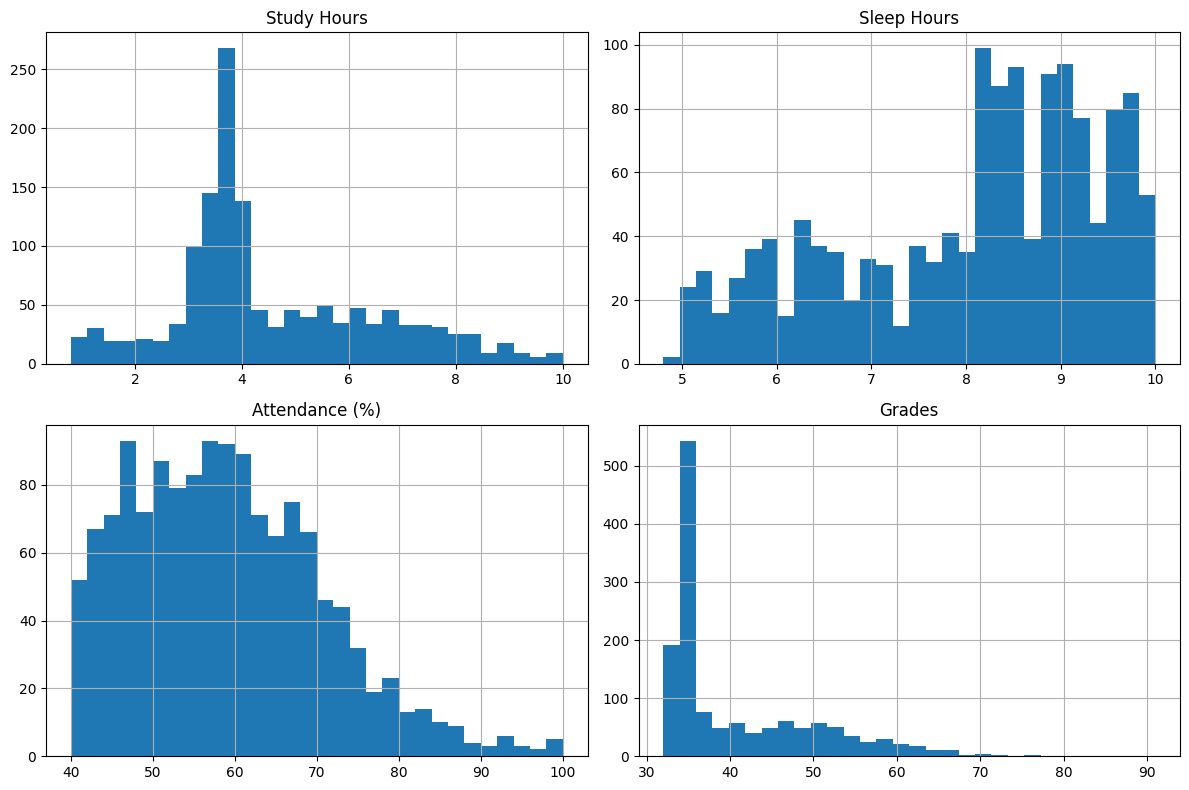

In [50]:
# Histograma de las variables numéricas
df[['Study Hours', 'Sleep Hours', 'Attendance (%)', 'Grades']].hist(bins=30, figsize=(12, 8))
plt.tight_layout()
plt.show()

Socioeconomic Score
0.10128    35.0
0.10155    34.0
0.10385    54.0
0.10696    35.0
0.10729    35.0
           ... 
0.99555    66.0
0.99599    77.0
0.99789    88.0
0.99847    54.0
0.99982    74.0
Name: Grades, Length: 1376, dtype: float64


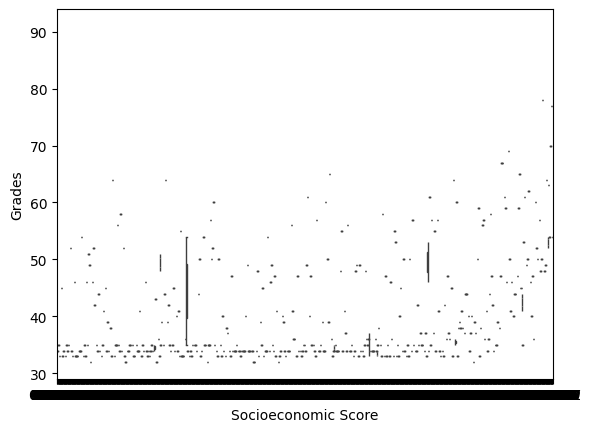

In [53]:
# Promedio de calificaciones por grupo socioeconómico
print(df.groupby('Socioeconomic Score')['Grades'].mean())

# Boxplot de calificaciones por grupo socioeconómico
sns.boxplot(x='Socioeconomic Score', y='Grades', data=df)
plt.show()


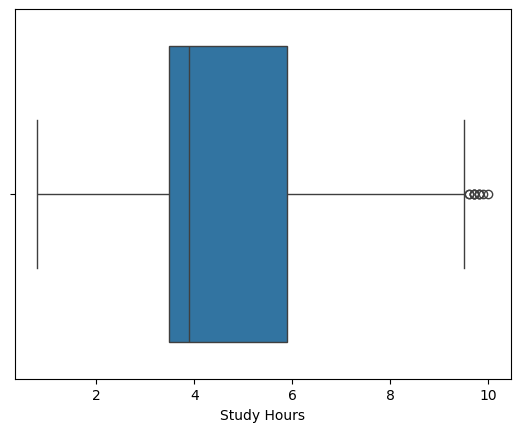

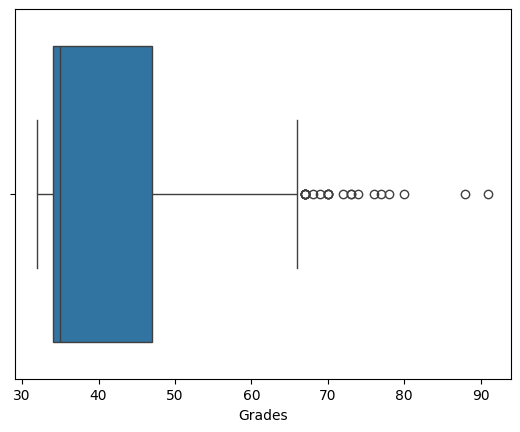

In [54]:
# Boxplot de las variables clave y conocer si existen outliers
sns.boxplot(x=df['Study Hours'])
plt.show()

sns.boxplot(x=df['Grades'])
plt.show()


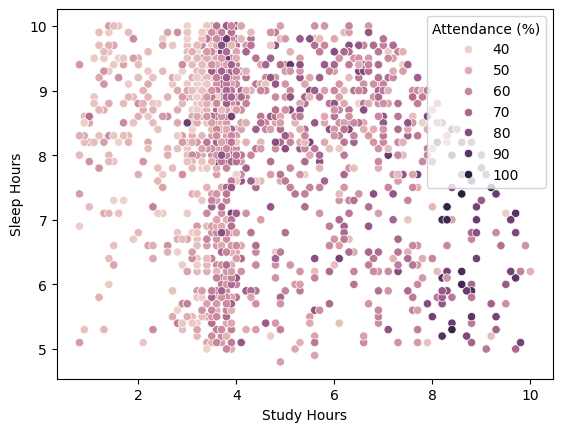

In [55]:
#¿Cómo afecta la combinación de horas de estudio, sueño y asistencia en las calificaciones de los estudiantes?
sns.scatterplot(x='Study Hours', y='Sleep Hours', hue='Attendance (%)', data=df)
plt.show()

#Modelo predictivo

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Definir las variables predictoras y la variable objetivo
X = df[['Study Hours', 'Sleep Hours', 'Attendance (%)']]
y = df['Grades']

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
print(f'Error cuadrático medio (MSE): {mse}')


Error cuadrático medio (MSE): 28.080215152196686
